# FordGoBike System Data
## by Rachel Strate

## Preliminary Wrangling

This notebook explores the August 2019 FordGoBike System data.  

In [1]:
#Importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Reading in the dataset.
df = pd.read_csv('201908-baywheels-tripdata.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No


In [3]:
df.shape

(210563, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210563 entries, 0 to 210562
Data columns (total 14 columns):
duration_sec               210563 non-null int64
start_time                 210563 non-null object
end_time                   210563 non-null object
start_station_id           210563 non-null int64
start_station_name         210563 non-null object
start_station_latitude     210563 non-null float64
start_station_longitude    210563 non-null float64
end_station_id             210563 non-null int64
end_station_name           210563 non-null object
end_station_latitude       210563 non-null float64
end_station_longitude      210563 non-null float64
bike_id                    210563 non-null int64
user_type                  210563 non-null object
bike_share_for_all_trip    210563 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 22.5+ MB


### What is the structure of your dataset?

The dataset has 210,563 entries and 14 features 
- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- bike_share_for_all_trip

The datatypes include ints, strings and floats.

### What are the main features of interest in your dataset?

I'm interested in exploring how rental ride duration, distance and days of the week differed by the type of user. Therefore, the main feature is the user type but will be supported by many of the other features.


### What features in the dataset do you think will help support your investigation into your features of interest?

I will be using the majority of the features for the analysis. The most useful, however, will be duration_sec, start_time, end_time, user_type, start_station_latititude, start_station_longitude, end_station_latititude, and end_station_longitude,

## Assessing

It is necesesary to do cleaning prior to conducting any analysis.  The following issues are addressed in the code below.

- The start time and end time are not in timedate format.
- A column for day of the week needs to be added.
- A column for minutes to be added in order for a duration unit that is more common.
- A column with the distance calculated from the latitude and longitude coordinates to be added.
- A column for time category to be added.

## Cleaning

#### Define
Change the data type of the start and end time to a timedate format.

#### Code

In [5]:
#Writing a function to change data types.
def dt_type (column):
    df[column] = pd.to_datetime(df[column])
    return 

In [6]:
#Instantiating the fuction
dt_type('start_time')
dt_type('end_time')

#### Test

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210563 entries, 0 to 210562
Data columns (total 14 columns):
duration_sec               210563 non-null int64
start_time                 210563 non-null datetime64[ns]
end_time                   210563 non-null datetime64[ns]
start_station_id           210563 non-null int64
start_station_name         210563 non-null object
start_station_latitude     210563 non-null float64
start_station_longitude    210563 non-null float64
end_station_id             210563 non-null int64
end_station_name           210563 non-null object
end_station_latitude       210563 non-null float64
end_station_longitude      210563 non-null float64
bike_id                    210563 non-null int64
user_type                  210563 non-null object
bike_share_for_all_trip    210563 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(4)
memory usage: 22.5+ MB


#### Define
Inserting a new column for the day of the week of the start_time column.

#### Code

In [8]:
#Inserting a column and setting the content to the day of the week. Remember 0 is Monday for dayofweek().
df.insert(3, 'day_of_week', df.start_time.dt.dayofweek)
df.head(3)

,duration_sec,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No


#### Test

In [9]:
df.head(3)

,duration_sec,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No


#### Define
Inserting a minutes column as duration in minutes is easier to understand than duration in seconds.

#### Code

In [10]:
#Creating new column.
df.insert(1, 'duration_min', df.duration_sec/60)

#### Test

In [11]:
df.head()

,duration_sec,duration_min,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No


#### Define
Adding a column with the distance calculated from the latitude and longitude coordinates.

#### Code

In [12]:
#Calculating distance.  Please note this code was found in the Udacity knowledge area.

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [13]:
#Instantiating function for the distance column.
df['distance'] = haversine(df['start_station_longitude'],
                          df['start_station_latitude'],
                          df['end_station_longitude'],
                          df['end_station_latitude'])

#### Test

In [14]:
df.head(1)

,duration_sec,duration_min,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.75,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.51727


In [15]:
df.distance.describe()

count    210563.000000
mean          1.673998
std           1.059922
min           0.000000
25%           0.930881
50%           1.444599
75%           2.188723
max          67.402478
Name: distance, dtype: float64

#### Define
Inserting a column for time categories (morning, afternoon, evening and late_night).  This column will be made for the start time only to be able to see at what point of the day do people rent bikes.

- Morning = 6am - 11am
- Afternoon = 12pm - 5pm
- Evening = 6pm - 12am
- Late_Night = 1am - 5pm

#### Code

In [16]:
#Inserting a new column.  Temporarily filling it with the start_time content.
df.insert(4, 'time_slot', df['start_time'])
df.head(1)

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.75,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,2019-08-31 21:27:42.253,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.51727


In [17]:
#Building a function to remove the hour from the datetime.
from datetime import datetime

def time_split(df, column):
    df[column] = df[column].apply(lambda x: datetime.strftime(x,'%H'))
    return df.head(5)

In [18]:
#Instantiating the function
time_split(df, 'time_slot')

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,21,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.517270
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,22,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No,1.478463
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,22,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No,1.478463
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,14,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No,0.601439
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,18,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No,0.000000


In [19]:
#Changing the column to an int data type.
df.time_slot = df.time_slot.astype(int)

In [20]:
#Using a lambda function to update the column with the time category.
col = ['time_slot']
for c in col:
    df['time_slot'] = df[c].apply(lambda x: 'morning' if x>5 and x<12 else 
                             'afternoon' if x>11 and x<18 else 
                             'evening' if x>17 and x<25 else 'late_night')

#### Test

In [21]:
df.head(10)

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,evening,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.517270
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No,1.478463
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No,1.478463
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,afternoon,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No,0.601439
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,evening,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No,0.000000
5,17193,286.550000,2019-08-31 20:52:40.744,2019-09-01 01:39:14.592,evening,5,49,S Park St at 3rd St,37.780760,-122.394989,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3503,Customer,No,1.071275
6,8959,149.316667,2019-08-31 22:44:38.213,2019-09-01 01:13:57.248,evening,5,323,Broadway at Kearny,37.798014,-122.405950,8,The Embarcadero at Vallejo St,37.799953,-122.398525,3028,Customer,No,0.686700
7,9528,158.800000,2019-08-31 22:04:15.446,2019-09-01 00:43:03.874,evening,5,160,West Oakland BART Station,37.805318,-122.294837,237,Fruitvale BART Station,37.775232,-122.224498,1577,Customer,No,7.023709
8,9542,159.033333,2019-08-31 22:03:56.506,2019-09-01 00:42:59.328,evening,5,160,West Oakland BART Station,37.805318,-122.294837,237,Fruitvale BART Station,37.775232,-122.224498,2534,Customer,No,7.023709
9,4121,68.683333,2019-08-31 23:26:05.751,2019-09-01 00:34:46.893,evening,5,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,9651,Customer,No,0.224007


## Univariate Exploration

Now that I have cleaned the data, there are only 5 main features of interest: day_of_week, time_slot, duration_min, user_type and distance.  I will cover each of them in that order here in the univariate exploration.

Firstly is day_of_week.  I am interested to see how the rentals are split across the different days.

In [22]:
df.head(1)

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.75,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,evening,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.51727


In [23]:
#Grouping the rentals for ease of visualizing.  
#With count all of the columns are the same, so user_type was randomly chosen.
rentals_per_day = df.groupby('day_of_week').user_type.count()

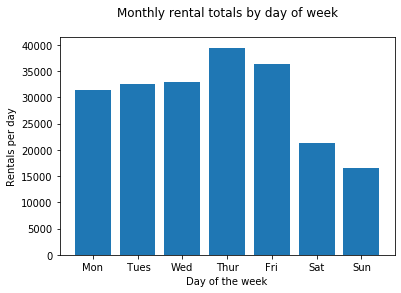

In [24]:
#As day of the week is qualitative a bar chart is used.

#Xtick labels added for clarity.
days = ['Mon', ' Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

rentals_by_day = df.day_of_week.value_counts()
plt.bar(days, rentals_per_day)
plt.title('Monthly rental totals by day of week\n')
plt.ylabel('Rentals per day')
plt.xlabel('Day of the week')
plt.xticks(days);

The bar chart shows the day with the most rentals being Thursday followed by Friday.  Whereas, the weekend is the opposite, with both Saturday and Sunday seeing approximately half the rides that were seen on Thursday.

Moving on I now look at the time_slot to see how rides are spread throughout the day based on if it is morning, afternoon, evening or late night. 

In [25]:
#Bar chart for the 4 time categories
df.time_slot= pd.Categorical(df.time_slot, categories=['morning', 'afternoon', 'evening', 'late_night' ], ordered=True)

time_cat = df.time_slot.value_counts().index
sb.countplot(data = df, x = 'time_slot', color = base_color)
plt.title('Monthly Totals by Time Category\n')
plt.ylabel('Total Rentals')
plt.xlabel('Time Category');

NameError: name 'base_color' is not defined

According the above bar chart, the time periods of the morning and afternoon are the busiest.  This translates to the time period between 6am and 5pm.

I now want to look at the average duration of a trip, firstly by looking at the statistics and then creating visuals.  As the duration is a continuous quantitative variable it makes sense to use a histogram.

In [ ]:
#Looking at the statistics of the duration in minutes variable we see that the spread is wide due to outliers above
#the 75% quartile.
df.duration_min.describe()

In [ ]:
#Plotting a basic histogram provides very little detail with the majority of the data lumped into the first bin.
plt.hist(df.duration_min)
plt.title('Number of rentals\n')
plt.xlabel('Rental duration (minutes)')
plt.ylabel('Duration of rentals');

In [ ]:
#By increasing the number of bins and setting an xlim() more detail comes to light.
plt.hist(df.duration_min, bins = 2000)
plt.xlim(0,60)
plt.title('Number of rentals\n')
plt.xlabel('Rental duration (minutes)')
plt.ylabel('Duration of rentals');

In [ ]:
#As this is a continuous variable, right skewed and has a long tail, I do a log transformation to explore for further.
step = .025
bins = 10 ** np.arange(0, np.log10(df.duration_min.max())+step, step)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')

plt.title('Duration Distribution\n')
plt.xlabel('Rental duration (minutes) (log)')
plt.ylabel('Duration of rentals')


plt.xticks([1,10e0, 10e1, 10e2], ['1', '10', '100', '1000'])
plt.show();

The duration of rentals has a wide spread from 1 minute to 1,424 minutes.  As seen in the first chart, these outliers make a standard histogram result with minimal meaning.  Implementing xlim() and, alternatively, looking at the logarithmic transformation I clearly see that the ride durations are distributed around 10 minutes which compares nicely to the mean of 9.8.



Moving on to distance, I am trying to understand the distribution.  What is the mean?  And what does the spread look like?

In [ ]:
#The average distance is not far, only 1.6 kilometers.
df.distance.mean()

In [ ]:
#Using a histogram.  It shows a distribution also around the 1.6k distance.
plt.hist(data = df, x = 'distance', bins = 200)
plt.title('Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Rentals')
plt.xlim(0,10);

The distance distribution shows that the users do not travel very far.  Due to outliers, I utilised a xlim() to zoom in on the main data and see that the majority of data falls under 4km.

Lastly is the user. I first want to look at the split between the two user groups, doing so in an absolute and relative approach.

In [ ]:
#Looking at the value counts it is quickly apparent that the users are mostly subscribers.
df.user_type.value_counts()

In [ ]:
#Plotting a bar chart as this variable is categorical.  We visually see the different in absolute user numbers
users = df.user_type.value_counts()
plt.bar(users.index, users )
plt.title('Total users')
plt.ylabel('Count')
plt.xlabel('Users by Category');

In [ ]:
#Calculating proportions to use for visualization in a pie chart.
sub_prop = df.query('user_type == "Subscriber"').user_type.count()/df.shape[0]
cust_prop = df.query('user_type == "Customer"').user_type.count()/df.shape[0]
sub_prop, cust_prop

In [ ]:
#Creating an array to use for the pie chart data.
users = np.array([sub_prop, cust_prop])
users

In [ ]:
#Creating the pie chart, adding the percentages for clarity of the difference.
plt.pie(users, labels = ['Subscribers', 'Customers'], autopct='%1.f%%')
plt.title('Users');

The users fall into two cateogries, either subscriber or customers. By firstly looking at the absolute numbers it is obvious there are substantial more subscribers; however, using the proportion in a pie chart makes it much easier to understand the difference.  The pie chart shows us that the subscribers are the bulk user with 78% of the rentals coming from this group.

I now create two smaller dataframes so that I can show two countplots together that illustrate the different user patterns based off the day of the week.

In [ ]:
#Creating smaller dataframes
df_sub = df.query('user_type == "Subscriber"')
df_cust = df.query('user_type == "Customer"')

In [ ]:
#Day of week and customer
fig, ax = plt.subplots(nrows=2, figsize = [8,5])

base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, x = 'day_of_week', color = base_color, ax = ax[0])
sb.countplot(data = df_cust, x = 'day_of_week', color = base_color, ax = ax[1] )

plt.show()

These last two charts show that that the user habits are very different.  The subscribers utilise the bikes mainly during the week with the customers renting more as the weekend approaches.

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?
During the univariate exploration I looked at 5 variables.

**Day of Week** - 
The days of the week were a unimodal distribution with the peak of the distribution being on Thursday.  

**Time Slot** - 
The two busiest times were morning and afternoon (the hours from 6am to 5pm). These time slots looked very similar to one another with a big decrease for evening and late night.

**Duration** - 
The duration distribution was right skewed with a long tail.  As duration is a continuous variable, I performed a logarithmic transformation which resulted in a normal distribution centered around 10 minutes. This corresponded nicely to the data mean of 9.8 minutes.

**Distance** -
The distance distribution was right skewed and showed that the distance travelled was quite minimun with the mean being 1.6km and the marjority of data being under 4km.

**User Type** -
The user type was very interesting as it came to light that during the month 78% of the rentals were from subscribers butthe renting habits of the subscribers and customers were opposite.  Whereas the subscribers rent more during the week, the customer rentals increase on the weekend.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

It was necessary to do some feature engineering as four of the five features needed to firstly be created. For instance, from start_time I was able to derive day_of_week and time_slot.  I created duration_min as this unit of measurement is easier to understand than duration in seconds.  And lastly, the distance was calculated using the longitude and latitude columns.

## Bivariate Exploration

In this next section I dig into the following relationships:
- Day and Duration
- Day and Time of Day
- Type of User and Day
- Type of User and Duration 
- Distance and Duration

Firstly is the relationship between day and duration as I am seeking to see how the duration will change over the days, specifically if there is a different on the week days to the weekend. I start by looking at the value counts and the quartiles to understand the spread of the duration data.

In [ ]:
#Duration value counts
df.duration_min.value_counts()

In [ ]:
#We see that 98% of the data is within a 45 minute duration.
df.duration_min.quantile(q = .98)

In [ ]:
#Day of the week value counts
df.day_of_week.value_counts()

In [ ]:
#98% of the data falls within 45 minutes or less. Create a smaller dataframe to omit outliers. 
df_no_outliers = df.query('duration_min < 46')

In [ ]:
#The box plot is chosen as I am analyzing a quantitative variable (duration) versus a qualitative variable
#(day of the week). 
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_no_outliers, x = 'day_of_week', y = 'duration_min', color = base_color)
plt.title('Rental Duration by Day')
plt.ylabel('Rental duration (mins)')
plt.xlabel('Day of week')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

The boxplot interestingly shows two distinct clusters as the week days are almost identical to each other and the weekend days are almost identical to each other.  The rental duration average is longer on the weekend, but by only a few minutes.

So now I look at how the rentals occur each day in comparison to the time slot.

In [ ]:
#Day and Time of Day
plt.figure(figsize=[8, 5])

sb.countplot(data = df, x = 'day_of_week', hue = 'time_slot', color = base_color);
plt.xlabel('Day of week')
plt.ylabel('Number of rentals')
plt.title('Rentals by Day and Time Period')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

This chart builds nicely upon a few of the univariate charts.  In the univariate chart for day of the week we saw an unimodal distribution with Thursday at the peak. In the univariate chart for time of day, the morning and afternoon looked equal and were the most popular times.  But now that we are looking at the two variables together a lot more detail comes to light.  During the week days morning is definitely the busiest.  On the weekend, mornings drop off and afternoon rentals increase.  This chart no longer makes the two time slots look equal, rather showing how the time slots shift from weekday versus weekend.

Before exploring how the users fit into all this, let's look at the day and the distance.  I am wondering if longer rides occur on the weekdays or how they distance compares considering the weekend duration mean increased only by a few minutes.

In [ ]:
#Looking at the tail to see the biggest distances.  There appears to be one outlier of 67 kilometers.
df.sort_values(by='distance').tail()

In [ ]:
#Using a scatter plot we see this one outlier
plt.scatter(data = df, x = 'duration_min', y = 'distance', alpha = .2)
plt.title('Duration vs Distance')
plt.ylabel('Distance (km)')
plt.xlabel('Duration (minutes)')
plt.show()

This chart has a lot of noise and doesn't provide much insight.  Therefore, I apply the ylim() and xlim() to zoom in.

In [ ]:
plt.scatter(data = df, x = 'duration_min', y = 'distance', alpha = .2)
plt.title('Duration vs Distnce')
plt.ylabel('Distance travelled (km)')
plt.xlabel('Duration (minutes)')
plt.ylim(0,10)
plt.xlim(0,200);

This chart is substantially more interesting as it shows the bulk of the rides are 60 minutes or less with the usual duration being below 8km.  We see that for shorter periods of time, people often travel further than users do for the long duration rentals.

What is difficult to see in this chart is the distance mean of 1.6k.  However, one can see that there are many dots at the 0km distance.  This is a bit misleading as what this distance calculates is actually the distance between start and end station.  For the individuals who rented and returned at the same station, this calculates as a distance of 0km.

But what happens if we pull the 0 distance numbers out?  How would this change the mean?

In [ ]:
df.distance.describe()

In [ ]:
df_no_zero = df.query('distance >0.000000')
df_no_zero

In [ ]:
df_no_zero.distance.mean()

Using a dataframe with the distance of 0km removed omits approximately 5000 entries.  The mean is affected but not signficantly.  Instead of a mean of 1.67km it is rather 1.72.

And now we look at the main feature of customer.  How does the type of user change with the day of the week?  And what is the relationship between customer and duration?

In [ ]:
#Users and Day of Week
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day_of_week', hue = 'user_type', color = base_color);
plt.xlabel('Day of week')
plt.ylabel('Number of rentals')
plt.title('User Type by Day')
plt.legend(['Customer','Subscriber'])
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

This visualization mirrors what we saw in the countplots in the univariate section but combines the data.  Once again we see subscriber use drops significantly on the weekend while the customer use increases to its highest point on Saturday.

For users to duration, I choose to plot both a blox plot and a violin plot.

In [ ]:
#Using a box plt
sb.boxplot(data = df_no_outliers, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('Type of user')
plt.ylabel('Rental duration (mins)')
plt.title('Rental Duration by User');

The box plot is informative and shows us that customers rent for a longer period of time.  However, to understand the distribution we look at a violin plot.

In [ ]:
sb.violinplot(data = df_no_outliers, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('Type of user')
plt.ylabel('Rental duration (mins)')
plt.title('Rental Duration by User');

I really like seeing the distribution on the violin chart as it clearly shows the sharp distribution of the subscribers compared the more gradual distribution of the customers.  The two types definitely have different rental habits in terms of day, time, and duration.  

Reflecting back on the pie chart in the univariate section, we recall that subscribers made up 78% of the user base. When looking at the distrubtion we see that the majority of these trips are around 5 minutes in duration.  

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

The bivariate charts built upon the univariate charts nicely, however, brought out some additional insight that was impossible to grasp before.  My favorite two charts were the boxplot showing the rental duration per day of the week and the voilin chart showing user and duration.  The box chart was fascinating as the days seemed to make two very clear cluster: weekdays and weekends.  The violin chart showed how the subscribers utilized the bikes for a short duration.  Though there was a tail on the distribution, the peak was steep.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No. I focused on the main features as there was quite a lot to explore.

## Multivariate Exploration

Now that we are at the multivariate exploration I want to re-circle on the quest of the analysis.  What relationships exist between the type of customers and the features of duration, day of the week and time slot?  We can answer this with two charts.

In [ ]:
#Original df
g = sb.FacetGrid(data = df, hue = 'user_type', height = 5)
g.map(plt.scatter,'duration_min', 'distance')
plt.ylim(0,10)
plt.xlim(0,200)
plt.title('Distance to Duration by Customer Type')
plt.ylabel('Distance (km)')
plt.xlabel('Duration (minutes)')
g.add_legend(title = None);

In [ ]:
g = sb.FacetGrid(data = df, hue = 'user_type', height = 5)
g.map(sb.stripplot,'day_of_week', 'duration_min', dodge = True)
plt.ylim(0,300)
plt.title('Day and Duration by User Type')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
g.add_legend(title = '');

Corresponding to many of the visualizations seen previously, we see that the habits of the different users are very different and that FordGoBike has two distinctly different consumer bases.  The subscribers use the bikes possibly for communiting as the trips are mainly during the week days, are short in duration and in distance with a big dropoff in use during the weekend.  The consumer rental interest peaks from Friday onwards and even though the distance travelled isn't far they will use the rental for a longer duration.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationships between the features of interest became strong and stronger as the analysis continued.

### Were there any interesting or surprising interactions between features?

I didn't expect the two user groups to be so distinctly different which became clearer and clearer as more variables were introduced.